In [3]:
import tensorflow as tf
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import os
import sys
import time
from tensorflow import keras

for module in (tf, mpl, np, keras):
    print(module.__name__, module.__version__)

tensorflow 2.0.0-alpha0
matplotlib 3.1.0
numpy 1.16.4
tensorflow.python.keras.api._v2.keras 2.2.4-tf


In [4]:
fashion_mnist = keras.datasets.fashion_mnist
(x_train_all, y_train_all), (x_test, y_test) = fashion_mnist.load_data()
x_valid, x_train = x_train_all[:5000], x_train_all[5000:]
y_valid, y_train = y_train_all[:5000], y_train_all[5000:]

print(x_valid.shape, y_valid.shape)
print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

(5000, 28, 28) (5000,)
(55000, 28, 28) (55000,)
(10000, 28, 28) (10000,)


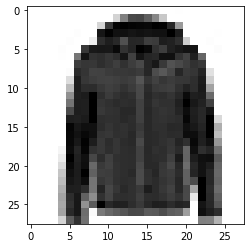

In [5]:
def show_single_image(img_arr):
    plt.imshow(img_arr, cmap = "binary")
    plt.show()
    
show_single_image(x_train[0])

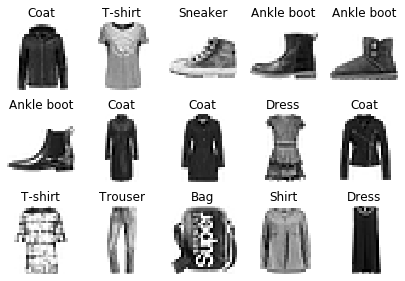

In [6]:
def show_imgs(n_rows, n_cols, x_data, y_data, class_names):
    assert len(x_data) ==  len(y_data)
    plt.figure(figsize = (n_cols * 1.4, n_rows * 1.6))
    for row in range(n_rows):
        for col in range(n_cols):
            index = n_cols * row + col
            plt.subplot(n_rows, n_cols, index + 1)
            plt.imshow(x_data[index], cmap="binary",
                      interpolation="nearest")
            plt.axis('off')
            plt.title(class_names[y_data[index]])
    plt.show()
    
class_names = ['T-shirt', 'Trouser', 'Pullover', 'Dress',
              'Coat', 'Sandal', 'Shirt', 'Sneaker', 
              'Bag', 'Ankle boot']
show_imgs(3, 5, x_train, y_train, class_names)

In [7]:
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape = [28, 28]))
model.add(keras.layers.Dense(300, activation = "relu"))
model.add(keras.layers.Dense(100, activation = "relu"))
model.add(keras.layers.Dense(10, activation = "softmax"))

# if y is one_hot vector then use categorical_crossentropy as loss function
model.compile(loss = "sparse_categorical_crossentropy",
              optimizer = "sgd",
              metrics = ["accuracy"])

In [8]:
#model.layers
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 300)               235500    
_________________________________________________________________
dense_1 (Dense)              (None, 100)               30100     
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1010      
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


In [9]:
# Simple kind of normalization...
x_train = x_train / 255
x_valid = x_valid / 255
x_test = x_test / 255

history = model.fit(x = x_train, y = y_train, epochs = 10, 
                    validation_data = (x_valid, y_valid))

Train on 55000 samples, validate on 5000 samples
Epoch 1/10
55000/55000 [==============================] - 6s 107us/sample - loss: 1.3835 - accuracy: 0.5971 - val_loss: 0.9537 - val_accuracy: 0.7134
Epoch 2/10
55000/55000 [==============================] - 5s 95us/sample - loss: 0.8427 - accuracy: 0.7370 - val_loss: 0.7481 - val_accuracy: 0.7694
Epoch 3/10
55000/55000 [==============================] - 6s 102us/sample - loss: 0.7103 - accuracy: 0.7725 - val_loss: 0.6600 - val_accuracy: 0.7914
Epoch 4/10
55000/55000 [==============================] - 5s 99us/sample - loss: 0.6428 - accuracy: 0.7915 - val_loss: 0.6081 - val_accuracy: 0.8096
Epoch 5/10
55000/55000 [==============================] - 6s 102us/sample - loss: 0.5994 - accuracy: 0.8056 - val_loss: 0.5737 - val_accuracy: 0.8170
Epoch 6/10
55000/55000 [==============================] - 6s 102us/sample - loss: 0.5691 - accuracy: 0.8126 - val_loss: 0.5468 - val_accuracy: 0.8214
Epoch 7/10
55000/55000 [=============================

In [10]:
test_loss, test_acc = model.evaluate(x_test, y_test)

10000/10000 [==============================] - 1s 52us/sample - loss: 0.5267 - accuracy: 0.8178


In [11]:
predictions = model.predict(x_test)
print(predictions[0])
print(np.argmax(predictions[0]), y_test[0])

[5.5731562e-05 2.7595201e-05 2.3248517e-04 4.6724937e-05 1.4586047e-04
 2.2466001e-01 1.3180537e-04 2.8187346e-01 7.0527894e-03 4.8577356e-01]
9 9


dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])